# Google App Store 分析 

In [2]:
# 导入库
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

## 预览数据

In [3]:
df = pd.read_csv('googleplaystore.csv')

df.drop_duplicates(subset='App', inplace=True)
df = df[df['Android Ver']!=np.nan]
df = df[df['Android Ver']!='NaN']
df = df[df['Installs']!='Free']
df = df[df['Installs']!='Paid']

In [5]:
print('Numbers of Apps in the dataset: ', df.shape[0])
df.sample(7)

Numbers of Apps in the dataset:  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9729,Naruto Shippuden - Watch Free!,VIDEO_PLAYERS,3.9,141515,5.7M,"10,000,000+",Free,0,Teen,Video Players & Editors,"April 23, 2014",0.6.0,2.3 and up
5369,I am Rich,FINANCE,4.3,180,3.8M,"5,000+",Paid,$399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
5956,"Survival Mobile:10,000 BC",FAMILY,4.3,7441,52M,"500,000+",Free,0,Everyone 10+,Strategy,"August 2, 2018",0.1.801,2.3 and up
8357,Citymapper - Transit Navigation,MAPS_AND_NAVIGATION,4.5,65448,Varies with device,"5,000,000+",Free,0,Everyone,Maps & Navigation,"August 2, 2018",Varies with device,Varies with device
4623,T-shirt design - Snaptee,LIFESTYLE,4.2,29756,45M,"1,000,000+",Free,0,Everyone,Lifestyle,"July 19, 2018",1.1.6.1,4.1 and up
4447,Psiphon Pro - The Internet Freedom VPN,COMMUNICATION,4.3,298041,Varies with device,"10,000,000+",Free,0,Everyone,Communication,"July 3, 2018",Varies with device,Varies with device
6094,BF games,FAMILY,4.1,262,29M,"50,000+",Free,0,Everyone,Puzzle,"November 1, 2017",1.1,4.0.3 and up


## 数据清理
* 把所有的App size变成MB
* 把'Installs'的‘+’号移除，并转换成数字类型
* 把所有的review文本变成英语

### 问题1: Installs

#### 代码

In [6]:
df['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

从上面查看，需要去除'+'和','。

In [7]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

#### 测试

In [9]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

### 问题2: size

* 'Varies with device'变成'NaN'
* 去掉'M'
* 去掉','
* 把'k'换成'M'并去掉
* 把size的类型变成float

#### 代码

In [11]:
df['Size'].sample(5)

631                    11M
8070                  6.9M
336     Varies with device
3116    Varies with device
7931    Varies with device
Name: Size, dtype: object

In [12]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: float(x))

#### 测试

In [14]:
df['Size'].sample(5)

9432    33.000
1452    18.000
450      0.118
3073    19.000
3689       NaN
Name: Size, dtype: float64

### 问题3: 修改Price
* 将Price的$去掉
* 并把值变成float型

#### 代码

In [15]:
df['Price'].sample(5)

4296        0
8414        0
9785    $2.99
6637        0
6167        0
Name: Price, dtype: object

In [16]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
df['Price'] = df['Price'].apply(lambda x: float(x))

#### 测试

In [17]:
df['Price'].sample(5)

6508    0.99
6504    0.00
7327    0.00
9185    0.00
2741    0.00
Name: Price, dtype: float64

### 问题4: Review

In [20]:
df['Reviews'].sample(10)

9070        172
5461          5
6511         72
8969          1
2761       4158
2374      15545
8474         68
5276        585
8114          0
5714    1170641
Name: Reviews, dtype: object

* 将数据类型转为int型

#### 代码

In [21]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

#### 测试

In [22]:
df['Reviews'].sample(10)

3585        67
10587       70
4840        99
6419         9
10041      168
10080        1
9184       410
248      20815
5047        51
7586     20463
Name: Reviews, dtype: int64

## EDA

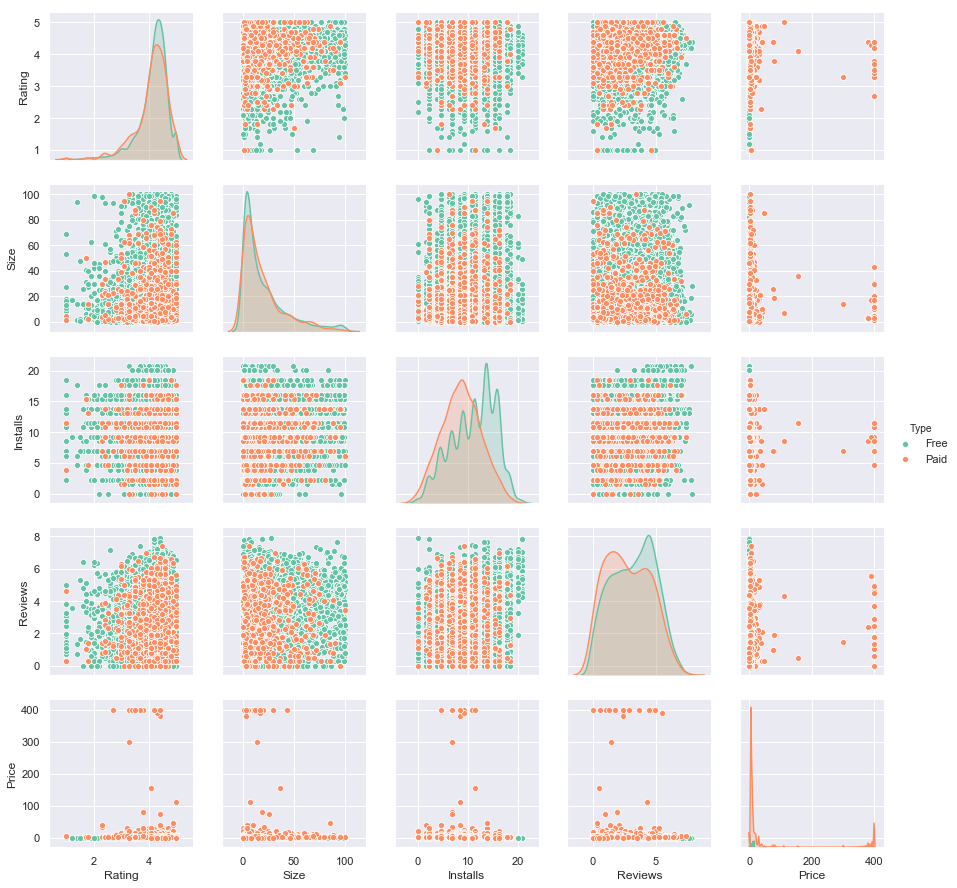

In [24]:
x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
p = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x,y,np.log(z), np.log10(p),t,price)),
                            columns=['Rating','Size','Installs','Reviews','Type','Price']), hue='Type', palette='Set2')

从上图中可以看到数据的明显模式和特征之间的关系。

### Android市场分解

In [27]:
number_of_apps_in_category = df['Category'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
)]

plotly.offline.plot(data, filename='active_category')

'active_category.html'

* Family和Game类的App占有量最多
* Tools, Business和Medical的数量也不少。

### App的平均rating

In [28]:
data = [go.Histogram(
    x = df.Rating,
    xbins={'start':1, 'size':0.1, 'end':5}
)]

print('Average app rating = ', np.mean(df['Rating']))
plotly.offline.plot(data, filename='overall_rating_distribution')

Average app rating =  4.173243045387998


'overall_rating_distribution.html'

平均的rating是4.17.

接下来让我们看看有没有那些种类的App比这个评级高很多或者低很多。

### 不同的种类的App的评分

使用Anova Test https://www.google.com/search?q=anova+test

F_onewayResult(statistic=12.79263715618054, pvalue=2.323280446259348e-20)

The p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.



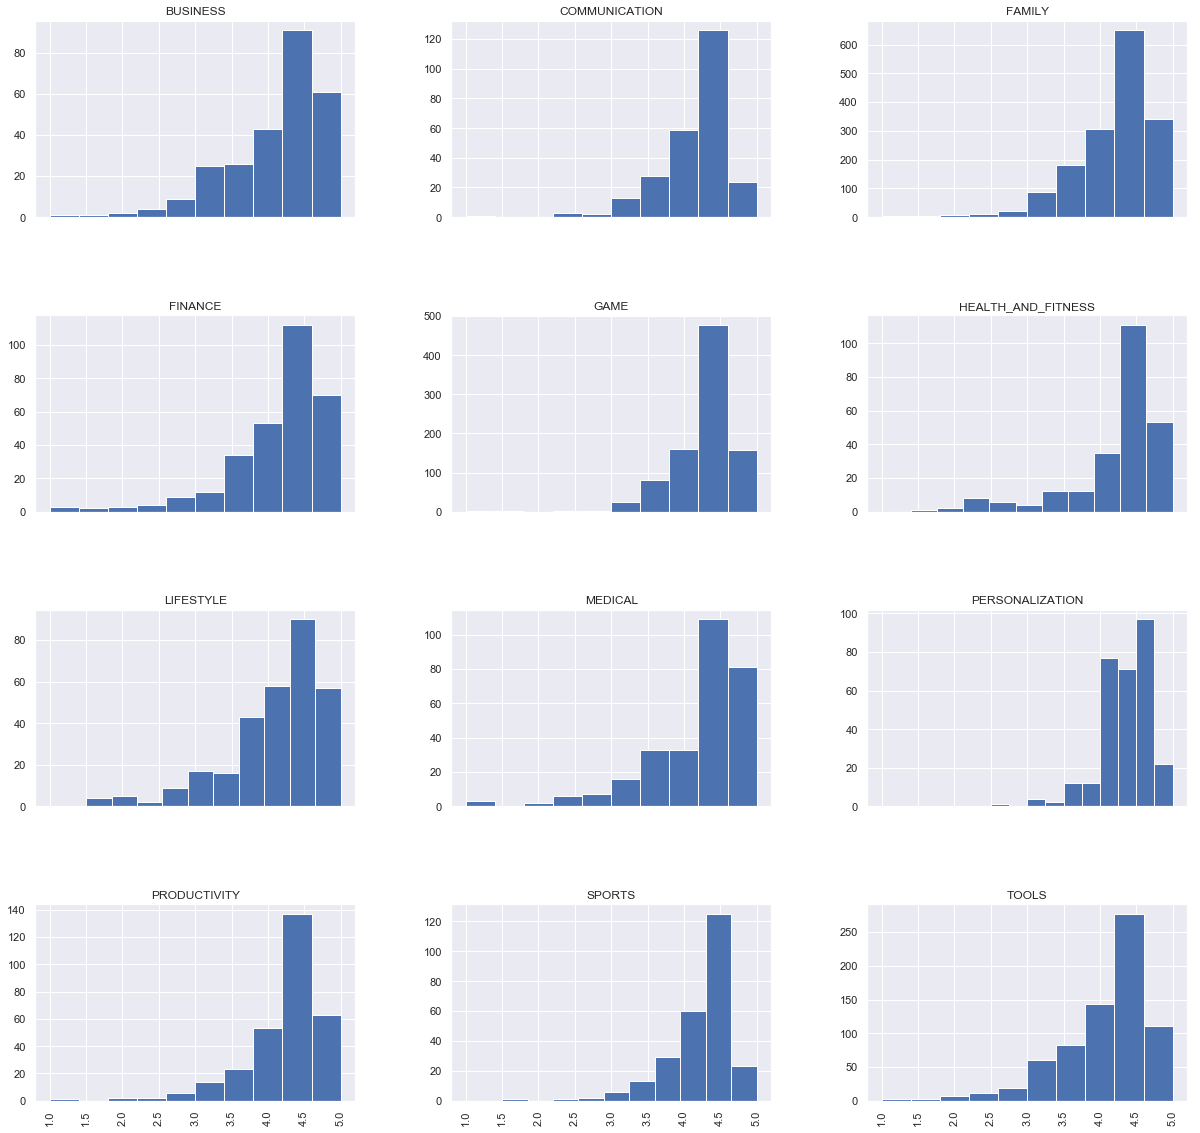

In [29]:
import scipy.stats as stats
f = stats.f_oneway(df.loc[df.Category == 'BUSINESS']['Rating'].dropna(),
                  df.loc[df.Category == 'FAMILY']['Rating'].dropna(),
                  df.loc[df.Category == 'GAME']['Rating'].dropna(),
                   df.loc[df.Category == 'PERSONALIZATION']['Rating'].dropna(),
                   df.loc[df.Category == 'LIFESTYLE']['Rating'].dropna(),
                   df.loc[df.Category == 'FINANCE']['Rating'].dropna(),
                   df.loc[df.Category == 'EDUCATION']['Rating'].dropna(),
                   df.loc[df.Category == 'MEDICAL']['Rating'].dropna(),
                   df.loc[df.Category == 'TOOLS']['Rating'].dropna(),
                   df.loc[df.Category == 'PRODUCTIVITY']['Rating'].dropna()
                  )

print(f)
print('\nThe p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.\n')

groups = df.groupby('Category').filter(lambda x: len(x)>286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

不同种类的app的rating显著的不同。

### 表现最好的种类

In [30]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()

print('Average rating = ', np.nanmean(list(groups.Rating)))

c = ['hsl('+str(h)+',50%'+',50%' for h in np.linspace(0, 720, len(set(groups.Category)))]

layout = { 'title': 'App ratings across major categories',
            'xaxis':{'tickangle': -40},
          'yaxis':{'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type': 'line',
              'x0':-.5,
              'y0':np.nanmean(list(groups.Rating)),
              'x1':19,
              'y1':np.nanmean(list(groups.Rating)),
              'line':{'dash': 'dashdot'}
          }]
    
}

data = [{
    'y': df.loc[df.Category == category]['Rating'],
    'type': 'violin',
    'name': category,
    'showlegend': False,
    
} for i,category in enumerate(list(set(groups.Category)))]

plotly.offline.plot({'data':data, 'layout':layout})

Average rating =  4.170026786973072


'temp-plot.html'

* 几乎所有的种类表现的都比较正常。Health and fitness还有Books and Reference产生了高质量的App，50%的App的rating大于4.5。
* 相反地，Dating类的App中有50%的rating低于平均值。
* Lifestyle，Family和Finance种类中有一些垃圾App。

### 体积的策略 - 小还是大？

体积对于App rating有怎么样的影响

In [32]:
groups = df.groupby('Category').filter(lambda x: len(x)>=50).reset_index()

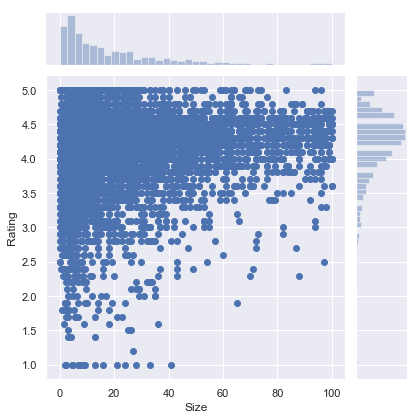

In [34]:
sns.set_style('darkgrid')
ax = sns.jointplot(df['Size'], df['Rating'])

大多数评分高的App体积都集中在~2MB - ~40MB。

In [35]:
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0,360,len(list(set(groups.Category))))]

subset_df = df[df.Size>40]
groups_temp = subset_df.groupby('Category').filter(lambda x: len(x)>20)

data = [{
    'x': groups_temp.loc[subset_df.Category==category[1]]['Rating'],
    'type': 'scatter',
    'y': subset_df['Size'],
    'name': str(category[1]),
    'mode': 'markers',
    'showlegend': True,
} for category in enumerate(['GAME', 'FAMILY'])]

layout = {'title':'Rating vs Size',
         'xaxis': {'title': 'Rating'},
         'yaxis': {'title': 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.plot({'data':data, 'layout':layout})

'temp-plot.html'

大多数的大App（> 50MB）是属于**GAME**和**FAMILY**种类的。除此之外，说明了这些App大是有它的原因的。

### 定价策略 —— Free Vs Paid?

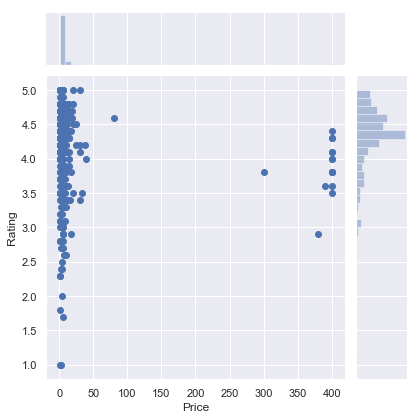

In [37]:
paid_apps = df[df.Price>0]
p = sns.jointplot('Price', 'Rating', paid_apps)

大多数的App的定价都在1 dollar ~30 dollar左右。只有几个App的价格在20 dollar。

### 目前的定价趋势 —— 如何对你的App进行定价？

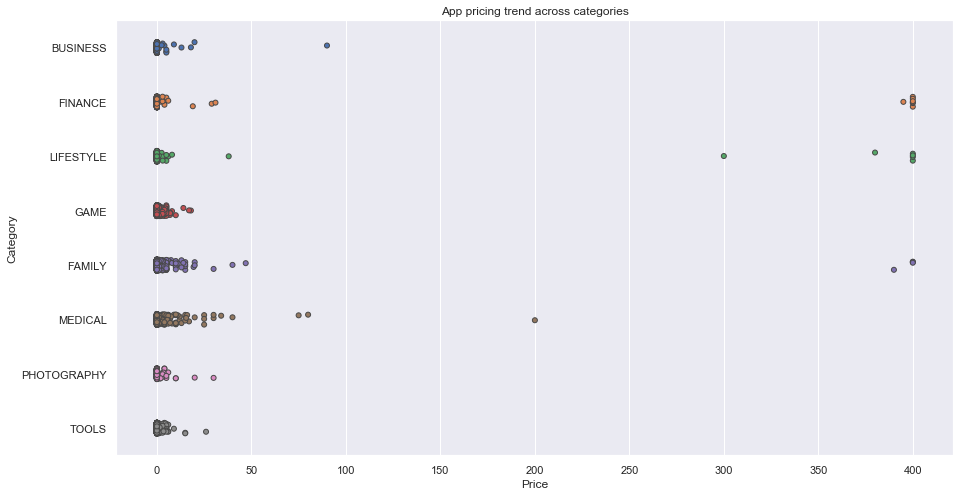

In [38]:
subset_df = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE', 'LIFESTYLE', 'BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
p = sns.stripplot(x='Price', y='Category', data=subset_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')

有些App的定价竟然超过了250 dollars。接下来检视一下这些App

In [39]:
df[['Category', 'App']][df.Price>200]

,Category,App
4197,FAMILY,most expensive app (H)
4362,LIFESTYLE,💎 I'm rich
4367,LIFESTYLE,I'm Rich - Trump Edition
5351,LIFESTYLE,I am rich
5354,FAMILY,I am Rich Plus
5355,LIFESTYLE,I am rich VIP
5356,FINANCE,I Am Rich Premium
5357,LIFESTYLE,I am extremely Rich
5358,FINANCE,I am Rich!
5359,FINANCE,I am rich(premium)


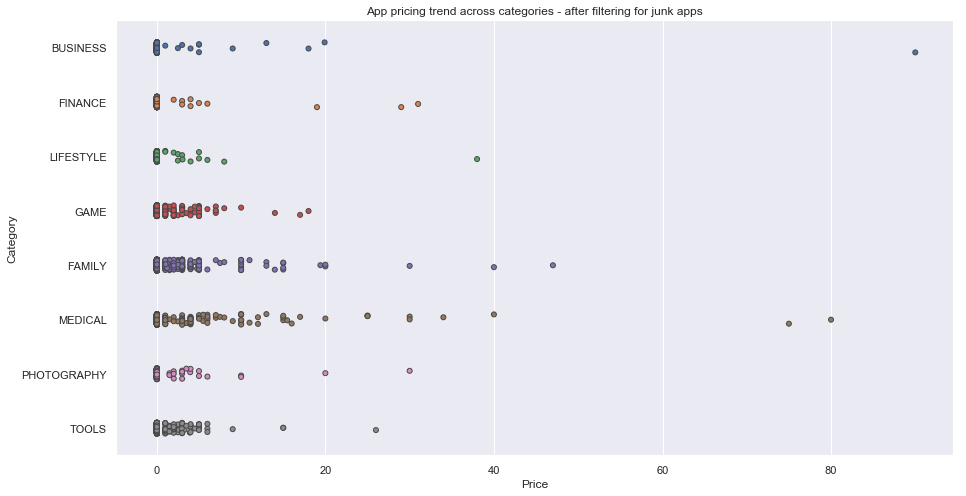

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
subset_df_price = subset_df[subset_df.Price<100]
p = sns.stripplot(x="Price", y="Category", data=subset_df_price, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories - after filtering for junk apps')

* 很显然，**Medical**和**Family**的App价格最贵。一些medical app甚至超过了80 dollars
* 大多数App的定价都低于20 dollars

### 在不同种类App中Paid和Free的分布

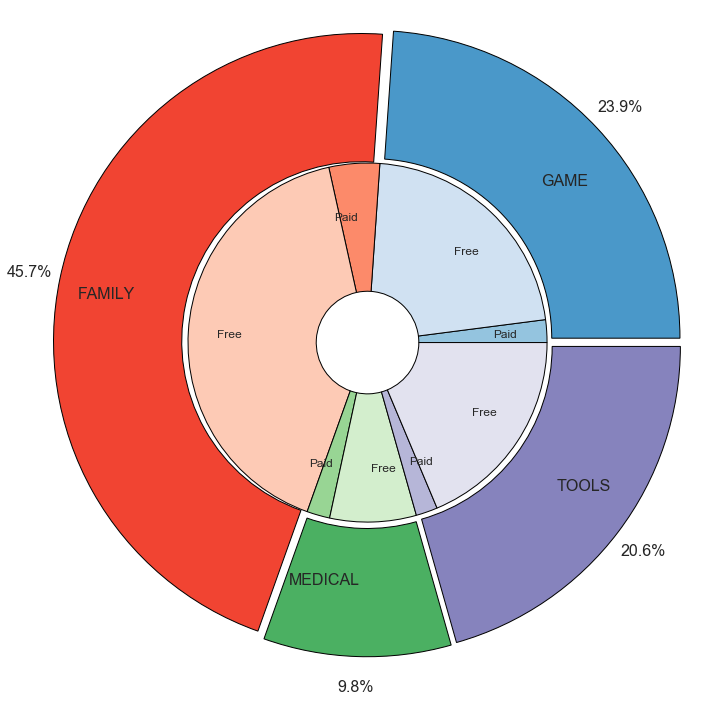

In [47]:
new_df = df.groupby(['Category', 'Type']).agg({'App': 'count'}).reset_index()
#print(new_df)

outer_group_names = ['GAME', 'FAMILY', 'MEDICAL', 'TOOLS']
outer_group_values = [len(df.App[df.Category==category]) for category in outer_group_names]

a, b, c, d = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]

inner_group_names = ['Paid', 'Free']*4
inner_group_values = []

for category in outer_group_names:
    for t in ['Paid', 'Free']:
        x = new_df[new_df.Category == category]
        try:
            inner_group_values.append(int(x.App[x.Type==t].values[0]))
        except:
            inner_group_values.append(0)
explode = (0.025, 0.025, 0.025, 0.025)

# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, texts, _ = ax.pie(outer_group_values, radius=1.2, labels=outer_group_names, autopct='%1.1f%%', pctdistance=1.1,
                        labeldistance=0.75, explode=explode, colors=[a(0.6), b(0.6), c(0.6),d(0.6)], textprops={'fontsize':16})
plt.setp(mypie, width=0.5, edgecolor='black')

# Second Ring (Inside)
mypie2, _ = ax.pie(inner_group_values, radius=1.2-0.5, labels=inner_group_names, labeldistance=0.7,
                  textprops={'fontsize':12}, colors=[a(0.4),a(0.2),b(0.4),b(0.2),c(0.4),c(0.2),d(0.4),d(0.2)])
plt.setp(mypie2, width=0.5,edgecolor='black')
plt.margins(0,0)

plt.tight_layout()
plt.show()

主要种类的分布

### Paid App和Free App是否下载量一样？

In [50]:
trace0 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Paid']),
    name='Paid',
    marker = dict(
        color='rgb(214,12,140)',
    )
)

trace1 = go.Box(
    y = np.log10(df['Installs'][df.Type=='Free']),
    name='Free',
    marker=dict(
        color='rgb(0,128,128)',
    )
)

layout = go.Layout(
    title = "Number of download of paid apps vs free apps",
    yaxis = {'title': 'Number of downloads (log-scaled)'}
)

data = [trace0, trace1]
plotly.offline.plot({'data': data, 'layout': layout})

'temp-plot.html'

* 付费App相比与免费App下载量更低，但是还不错。

### 付费App和免费App的大小有什么不同？

In [57]:
temp_df = df[df.Type=='Paid']
temp_df = temp_df[temp_df.Size>5]

data = [{
    'x': temp_df['Rating'],
    'type':'scatter',
    'y': temp_df['Size'],
    'mode': 'markers',
    'text': df['Size'],
} for t in set(temp_df.Type)]

layout = {'title':'Rating vs Size',
            'xaxis': {'title': 'Rating'},
              'yaxis': {'title': 'Size (in MB)'},
                       #'plot_bgcolor': 'rgb(0,0,0)'
         }
plotly.offline.plot({'data': data, 'layout':layout})

'temp-plot.html'

* 大多数的具有高评分的付费App体积都比较小。这意味着大多数的付费App都被开发和设计与特定都用途。
* 用户更喜欢体积小都App，如果一个付费App做的比较大，在市场上的表现不会很好。

### 探索相关性

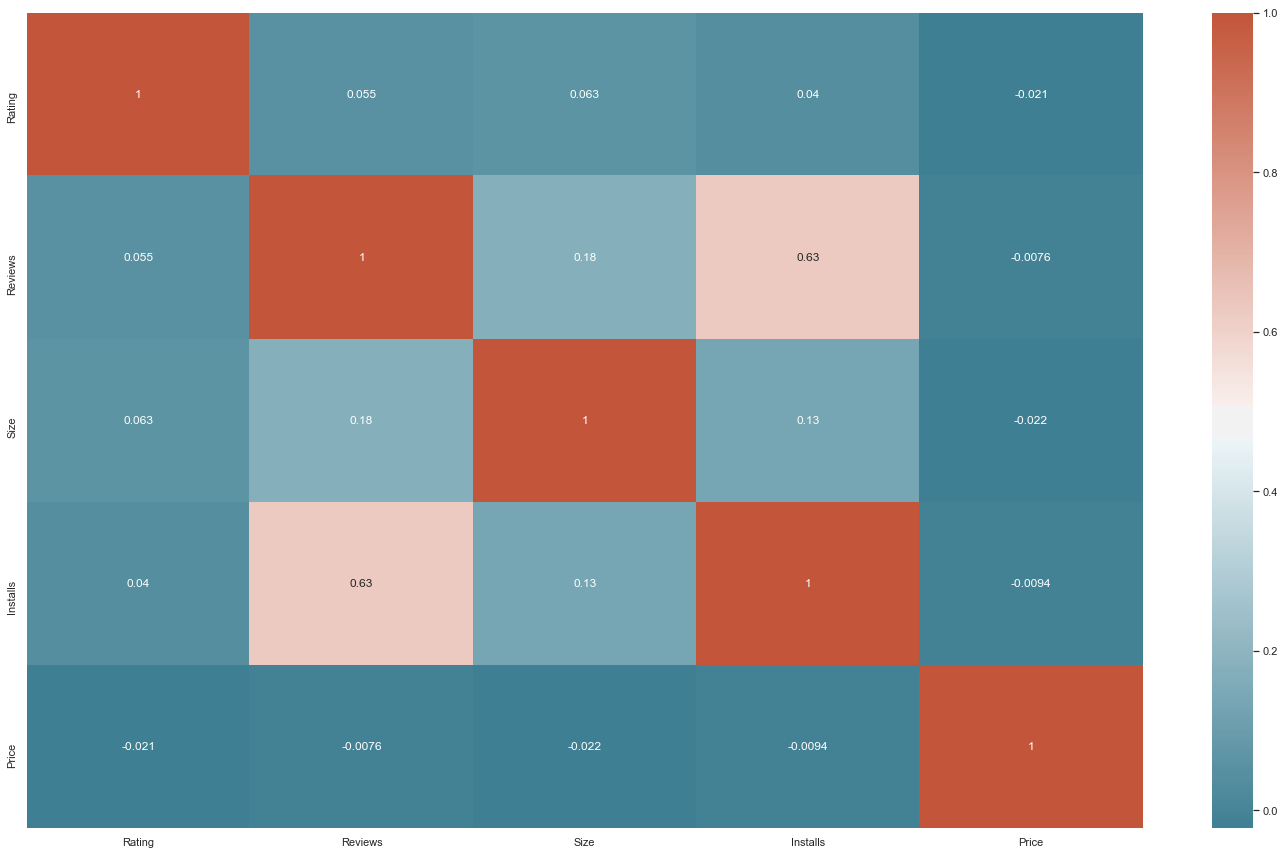

In [59]:
corrmat = df.corr()
p = sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220,20,as_cmap=True))

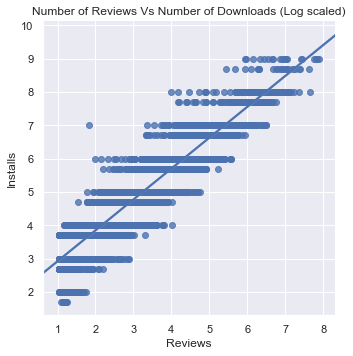

In [60]:
df_copy = df.copy()

df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy.Installs > 10]

df_copy['Installs'] = np.log10(df['Installs'])
df_copy['Reviews'] = np.log10(df['Reviews'])

sns.lmplot("Reviews", "Installs", data=df_copy)
ax = plt.gca()
_ = ax.set_title("Number of Reviews Vs Number of Downloads (Log scaled)")

reviews和installs具有比较大的相关性为0.63。这意味着用户更倾向于下载那些评论数较多的App。

这也意味着许多活跃的用户在下载完应用以后，还会留下评论。

因此想要让一个App更加的受欢迎，就让更多的人来评论把。

### 基本的情感分析

In [62]:
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

In [63]:
merged_df = pd.merge(df, reviews_df, on='App', how='inner')
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

In [66]:
grouped_sentiment_category_count = merged_df.groupby(['Category', 'Sentiment']).agg({'App':'count'}).reset_index()
grouped_sentiment_category_sum = merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()

new_df = pd.merge(grouped_sentiment_category_count, grouped_sentiment_category_sum, on=['Category'])
new_df['Sentiment_Normalized'] = new_df.App/new_df.Sentiment_y
new_df = new_df.groupby('Category').filter(lambda x: len(x)==3)

new_df

trace1 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y=new_df.Sentiment_Normalized[::3][6:-5],
    name='Negative',
    marker=dict(color='rgb(209,49,20)')
)

trace2 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y=new_df.Sentiment_Normalized[1::3][6:-5],
    name='Neutral',
    marker=dict(color='rgb(49,130,189)')
)

trace3 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y=new_df.Sentiment_Normalized[2::3][6:-5],
    name='Positive',
    marker=dict(color='rgb(49,189,120)')
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title='Sentiment analysis',
    barmode = 'stack',
    xaxis={'tickangle': -45},
    yaxis={'title': 'Fraction of reviews'}
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot({'data': data, 'layout':layout})

'temp-plot.html'

* Health和Fitness的App表现的最好，有85%的正面评价
* 相反地，需要的有游戏和社交App表现的很差，有50%的正面和50%的负面评价。

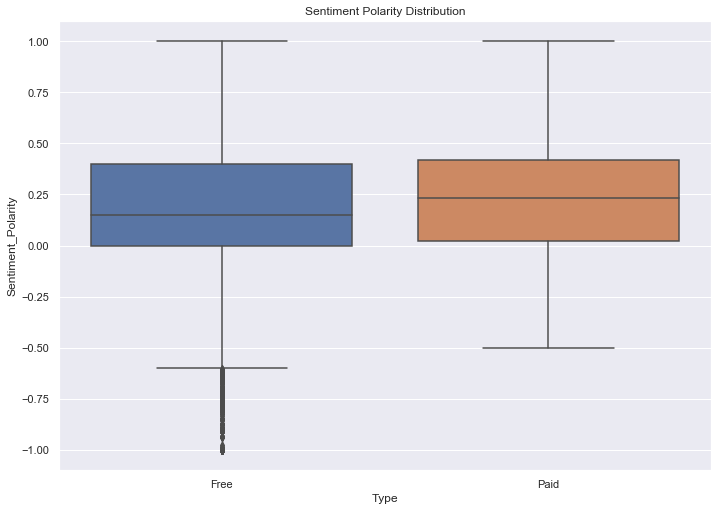

In [68]:
sns.set_style('ticks')
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df)
title = ax.set_title('Sentiment Polarity Distribution')

* 免费的App受到了很多的严厉的批评，也就是上面的负值部分。
* 对于付费App的评价都比较中规中矩。评价不会太极端。

### 词云

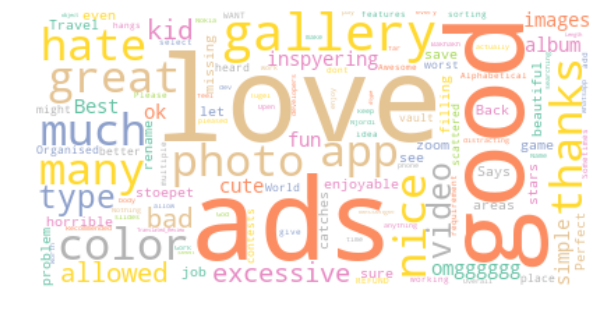

In [71]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=200, colormap="Set2")

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop = stop + ['app', 'APP', 'ap', 'App', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address', 
              'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Laucher']

merged_df['Translated_Review'] = merged_df['Translated_Review'].apply(lambda x: " ".join(x for x in str(x).split(' ') if x not in stop))
merged_df.dropna(subset=['Translated_Review'], inplace=True)

free = merged_df.loc[merged_df.Type=='Free']['Translated_Review'].apply(lambda x:'' if x=='nan' else x)
wc.generate(''.join(str(free)))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

从词云中可以看到，免费App的关键词
正面的：good, love, great, best。
负面的：ads, bad, hate。

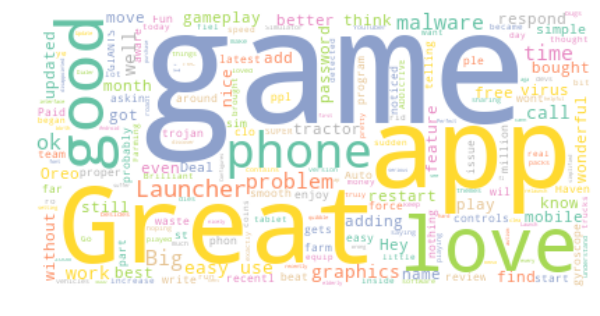

In [72]:
paid = merged_df.loc[merged_df.Type=='Paid']['Translated_Review'].apply(lambda x:'' if x=='nan' else x)
wc.generate(''.join(str(paid)))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

从词云中可以看到，收费App的关键词 正面的：Great, love, good
负面的：malware, problem。

### 结论